<a href="https://colab.research.google.com/github/Provincial2511/kaggle/blob/main/ZP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Получите базовое решение

Проведите первичный и визуальный анализ данных

Сделайте предобработку данных

Обучите модель классификации с целевым признаком salary

Проведите отбор признаков минимум с помощью трех подходов

Оцените подходящие метрики качества

Сформулируйте выводы по проделанной работе

****
возраст

класс работы: Частная, Самозанятая, Федеральное правительство, местное правительство, правительство штата, Без оплаты, Никогда не работала.

fnlwgt ?

образование: Бакалавры, Некоторые-колледжи, 11-е, высшее, Профессиональная школа, доценты acdm, доценты voc, 9-е, 7-8-е, 12-е, магистратура, 1-4-е, 10-е, докторантура, 5-6-е, Дошкольное образование.

образование-номер

семейное положение: Женат (гражданская супруга), Разведен (а), Никогда не был женат(а), Живет раздельно (а), Вдовец(а), Супруг(а) отсутствует(а), Женат(а) после(а) брака.

профессия: Техническая поддержка, Ремонт оборудования, Прочие услуги, Продажи, Руководитель-менеджер, Профессиональная специальность, Уборщики-разнорабочие, Машинный инспектор, Администратор-клерк, Сельское хозяйство-рыболовство, Транспортные перевозки, Частный дом, Охрана, Вооруженные силы.

тип отношений: Жена, Собственный ребенок, Муж, Не состоит в браке, Другие родственники, Не женат.

раса: Белые, Азиаты, Выходцы с тихоокеанских островов, Американские индейцы, эскимосы, Другие, Черные.

пол: Женщина, Мужчина.

прирост капитала

убыль капитала

количество часов в неделю

страна происхождения: США, Камбоджа, Англия, Пуэрто-Рико
****

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression, SGDRegressor
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.metrics import confusion_matrix, precision_recall_curve, auc, PrecisionRecallDisplay, classification_report, roc_curve, RocCurveDisplay
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.svm import LinearSVC
from sklearn.impute import SimpleImputer, KNNImputer
from sklearn.preprocessing import OneHotEncoder, StandardScaler, LabelEncoder
from sklearn.compose import ColumnTransformer
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import TomekLinks
from category_encoders import TargetEncoder


import warnings
warnings.filterwarnings('ignore')

In [ ]:
data = pd.read_csv('salary.csv')
data

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [ ]:
data.dtypes

age                int64
workclass         object
fnlwgt             int64
education         object
education-num      int64
marital-status    object
occupation        object
relationship      object
race              object
sex               object
capital-gain       int64
capital-loss       int64
hours-per-week     int64
native-country    object
salary            object
dtype: object

In [ ]:
num_cols = data.select_dtypes(include=int)
cat_cols = data.select_dtypes(include=object)


In [ ]:
#X = data.drop('salary', axis=1)
y = data['salary']


X = data.drop(cat_cols + 'salary', axis=1)

X_trainBASE, X_testBASE, y_trainBASE, y_testBASE = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
model_base = LogisticRegression()
model_base.fit(X_trainBASE, y_trainBASE)
print(classification_report(y_testBASE, model_base.predict(X_testBASE)))

              precision    recall  f1-score   support

       <=50K       0.81      0.97      0.88      7455
        >50K       0.73      0.26      0.39      2314

    accuracy                           0.80      9769
   macro avg       0.77      0.62      0.63      9769
weighted avg       0.79      0.80      0.76      9769



****
EDA

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education-num   32561 non-null  int64 
 5   marital-status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital-gain    32561 non-null  int64 
 11  capital-loss    32561 non-null  int64 
 12  hours-per-week  32561 non-null  int64 
 13  native-country  32561 non-null  object
 14  salary          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [ ]:
y.value_counts()

salary
<=50K    24720
>50K      7841
Name: count, dtype: int64

In [ ]:
data.isna().sum()

age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
salary            0
dtype: int64

In [ ]:
num_cols.describe()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


У нас есть 6 вещественных признаков и 9 категориальных.

Классы несбалансированны

 **age**: Медианное значение - 37 лет, стандартное отклонение - 13 лет. Минимальный возраст - 17 лет, максимальный - 90 лет. Есть аномалии

**fnlwgt**: Медианное значение - 178 356, стандартное отклонение - 105 550. Минимальное значение - 189 778, максимальное - 1 484 705. Есть аномалии

**education-num**: Здесь представлены номера, которые обозначают то или иное образование.

**Capital-gain** совместно с **capital-loss**: У большинства строк (больше 90%) - значение нулевое. Следовательно - есть аномалии

**hours-per-week**:  Медианное значение - 40, стандартное отклонение - 12 часов. Минимальное значение - 1 час, максимальное - 99 часов. Есть аномалии



In [ ]:
print('Количество строк, где значение > 0:', data[data['capital-gain'] > 0].shape, data[data['capital-loss'] > 0].shape)

print('Соотношение capital-gain > 0 и генеральной выборки в процентах:', round(len(data[data['capital-gain'] > 0]) * 100 / len(data), 3), '%')

print('Соотношение capital-loss > 0 и генеральной выборки в процентах:', round(len(data[(data['capital-loss'] > 0)]) * 100 / len(data), 3), '%')



Количество строк, где значение > 0: (2712, 15) (1519, 15)
Соотношение capital-gain > 0 и генеральной выборки в процентах: 8.329 %
Соотношение capital-loss > 0 и генеральной выборки в процентах: 4.665 %


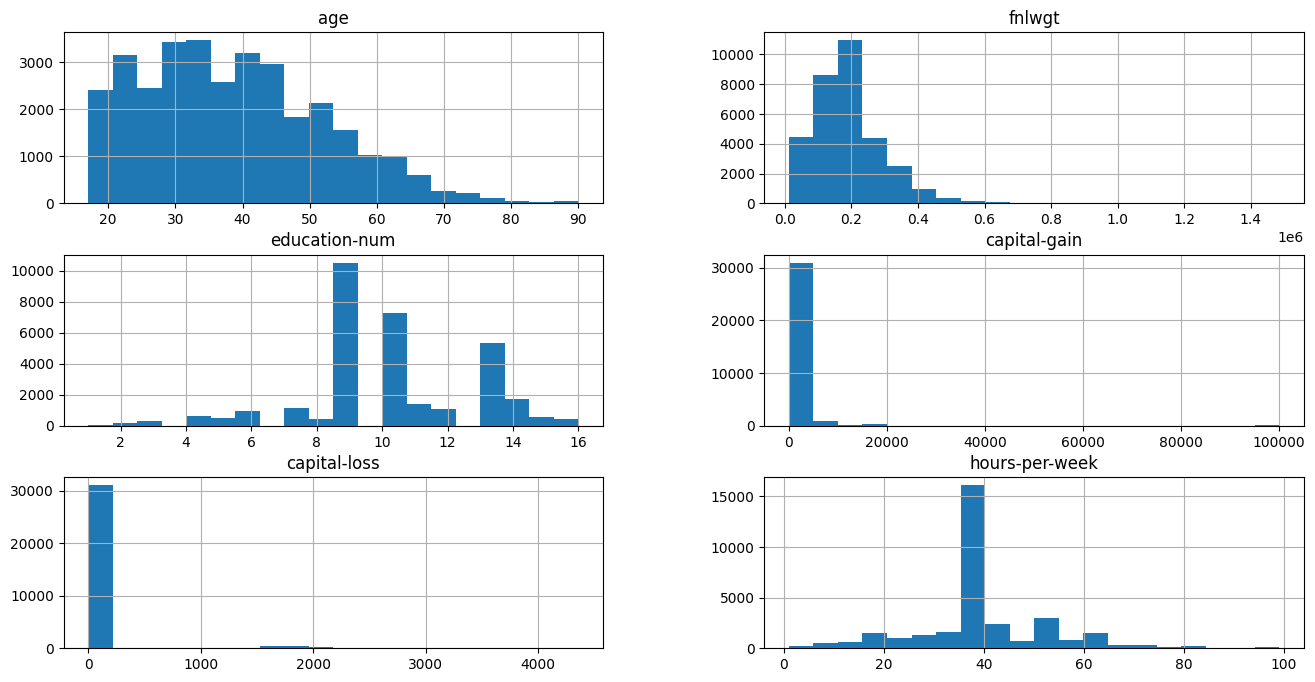

In [ ]:
data.hist(figsize=(16, 8), bins=20);

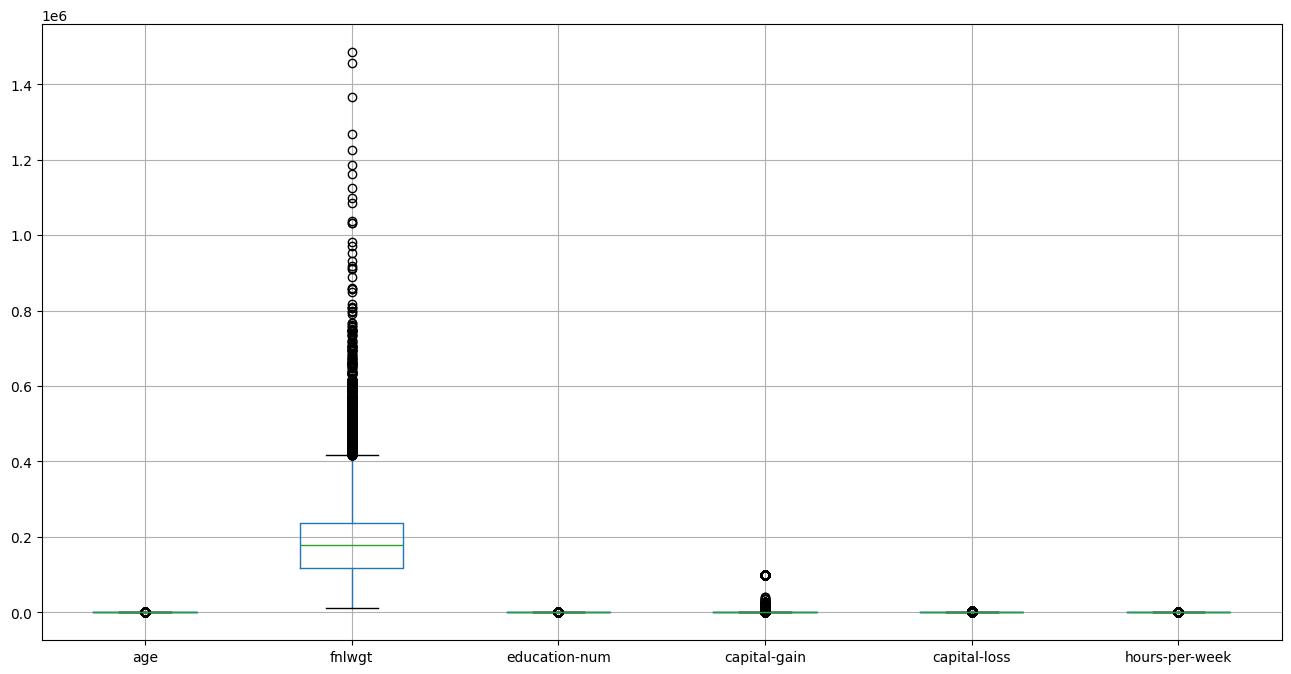

In [ ]:
data.boxplot(figsize=(16, 8));

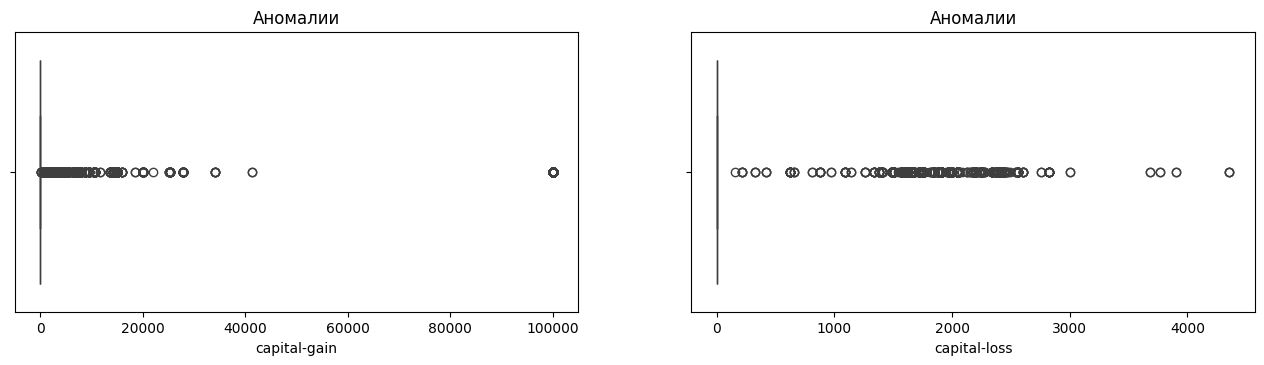

In [ ]:
plt.figure(figsize=(16, 8))

plt.subplot(2,2,1)
sns.boxplot(x = data['capital-gain'])
plt.title('Аномалии')

plt.subplot(2,2,2)
sns.boxplot(x = data['capital-loss'])
plt.title('Аномалии')

plt.show()

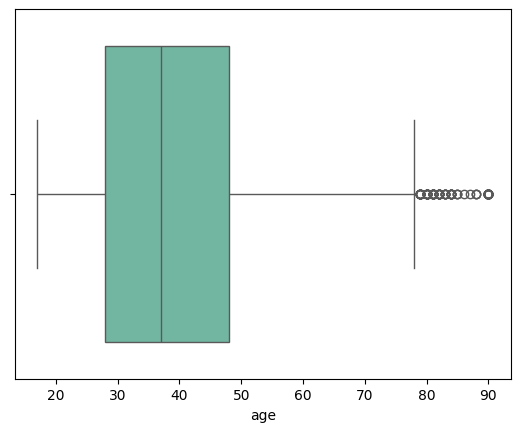

In [ ]:
sns.boxplot(x ='age', data = data, palette="Set2");

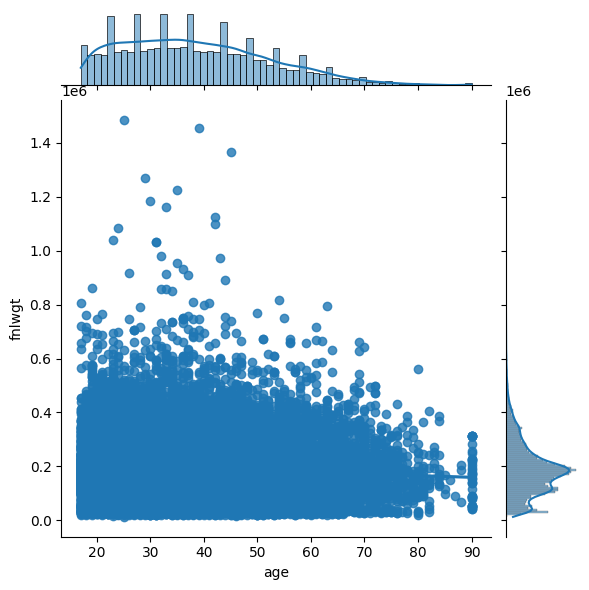

In [ ]:
grid = sns.jointplot(x=data['age'], y=data['fnlwgt'], kind='reg', palette="Set2")

plt.show()

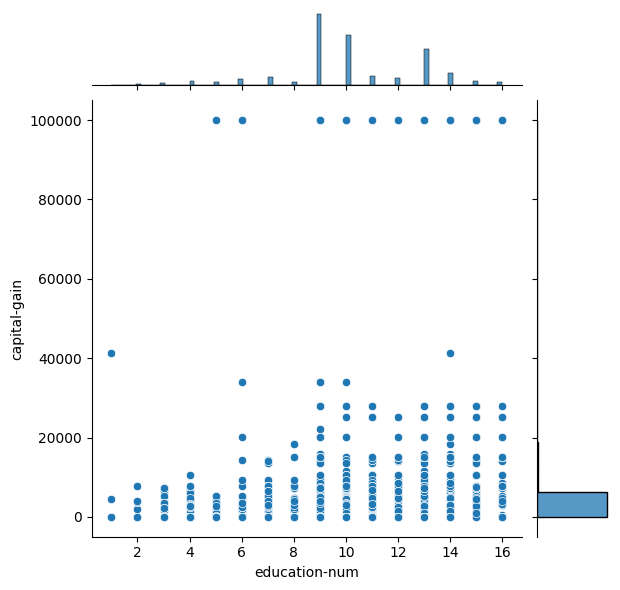

In [ ]:
sns.jointplot(x=data['education-num'], y=data['capital-gain'], kind='scatter', palette="Set2")

plt.show()

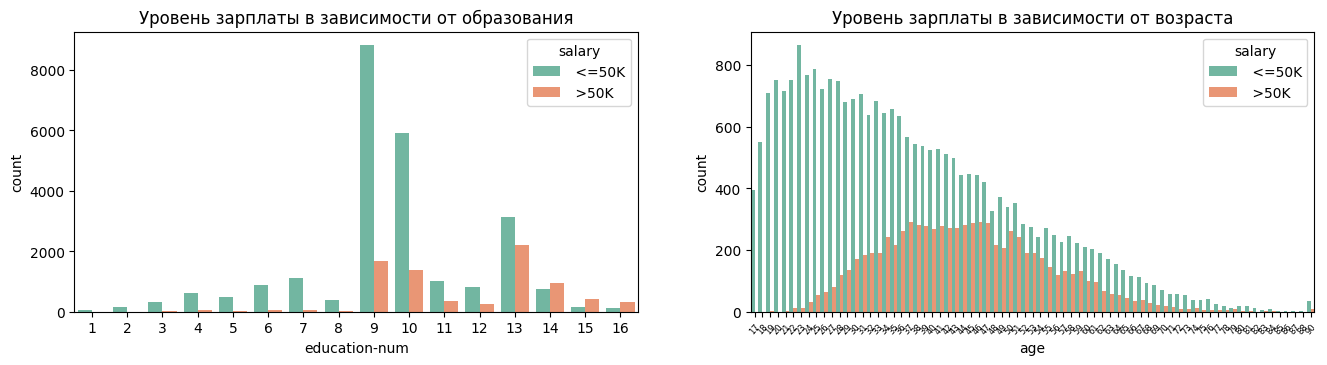

In [ ]:
plt.figure(figsize=(16, 8))

plt.subplot(2,2,1)
sns.countplot(x=data['education-num'], hue=y, palette="Set2")
plt.title('Уровень зарплаты в зависимости от образования')

plt.subplot(2,2,2)
sns.countplot(x=data['age'], hue=y, width=1, palette="Set2")
plt.title('Уровень зарплаты в зависимости от возраста')
plt.xticks(rotation=50, fontsize=6)

plt.show()

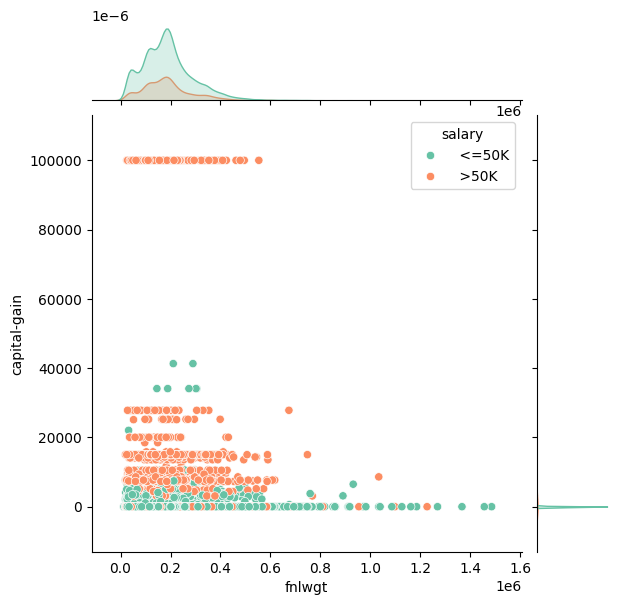

In [ ]:
sns.jointplot(x=data['fnlwgt'],  y=data['capital-gain'], hue=y, kind='scatter', palette="Set2")

plt.show()

****
По вещественным признакам - Так как у нас есть аномалии, то будем обрабатывать их позже в пайплайне.

с 9 по 16 уровень образования может свидетельствовать нам о повышенной зарплате. Возможен вариант применения Label энкодера

Возраст от 23 до 40 +-. Еще подумаем, как можно будет поступить с этим признаком
****

In [ ]:
cat_cols.describe()

,workclass,education,marital-status,occupation,relationship,race,sex,native-country,salary
count,32561,32561,32561,32561,32561,32561,32561,32561,32561
unique,9,16,7,15,6,5,2,42,2
top,Private,HS-grad,Married-civ-spouse,Prof-specialty,Husband,White,Male,United-States,<=50K
freq,22696,10501,14976,4140,13193,27816,21790,29170,24720


**workclass**: 9 уникальных значений. Наиболее часто встречаемое значение занимает 70% от всей колонки.

**education**: 16 уникальных значений. Наиболее часто встречаемое значение занимает 32% от всей колонки.

**marital-status**: 7 уникальных значений. Наиболее часто встречаемое значение занимает около 37% от всей колонки.

**occupation**: 15 уникальных значений. Нет сильно превосходящего класса

**relationship**: 6 уникальных значений. Большинство замужем

**race**: 5 уникальных значений. Белые люди занимают около 87% от всей колонки

**sex**: Большинство - мужчины

**native-country**: 42 разные страны. но 90% - США

**salary**: Большинство людей получает меньше 50.000

In [ ]:
data['relationship'].value_counts()

relationship
Husband           13193
Not-in-family      8305
Own-child          5068
Unmarried          3446
Wife               1568
Other-relative      981
Name: count, dtype: int64

In [ ]:
private_data = data[data['workclass'] == ' Private']
print('Private in workclass:', round(len(private_data) * 100 / len(data), 3), '%')

education_data = data[data['education'] == ' HS-grad']
print('HS-grad in education:', round(len(education_data) * 100 / len(data), 3), '%')

country_data = data[data['native-country'] == ' United-States']
print('United-States in native-country:', round(len(country_data) * 100 / len(data), 3), '%')


Private in workclass: 69.703 %
HS-grad in education: 32.25 %
United-States in native-country: 89.586 %


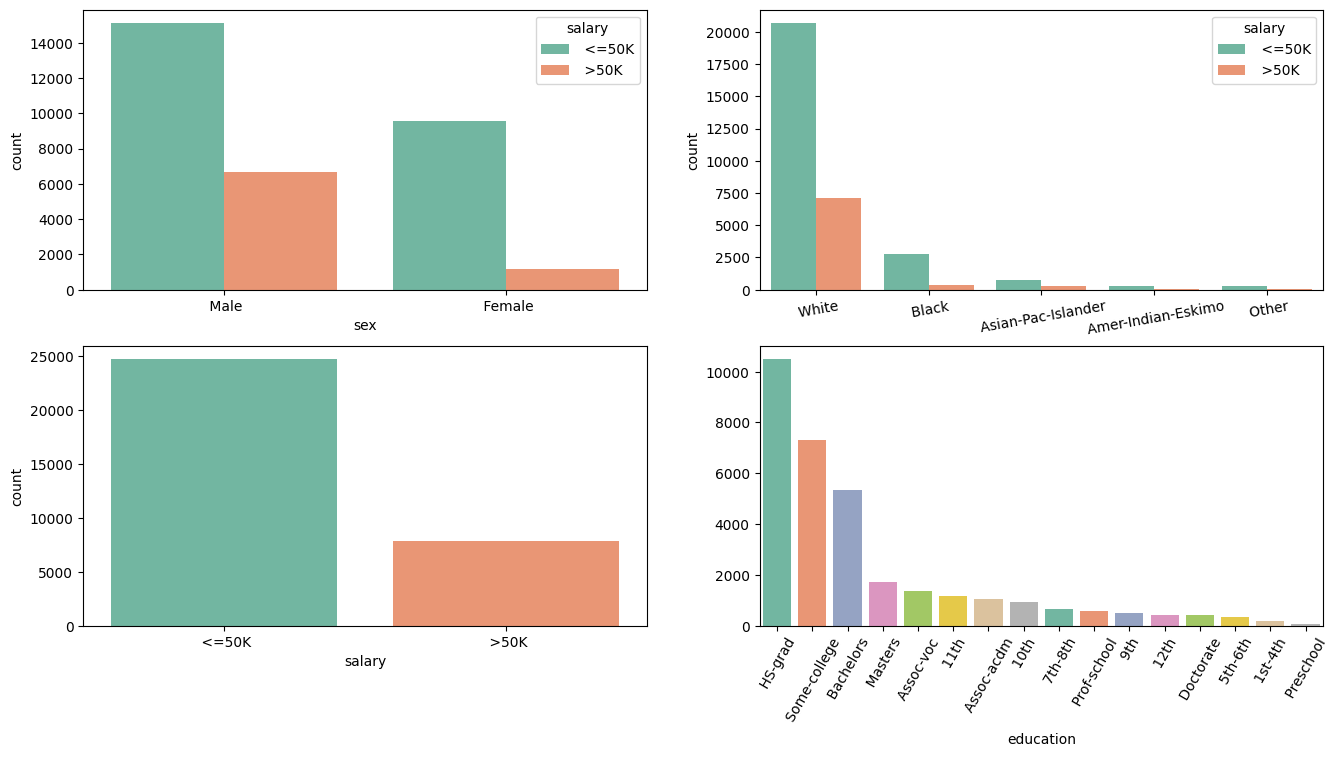

In [ ]:
plt.figure(figsize = (16,8))

plt.subplot(2, 2, 1)
sns.countplot(x=data['sex'],  hue = y, palette="Set2")

plt.subplot(2, 2, 2)
sns.countplot(x=data['race'],  hue = y, palette="Set2")
plt.xticks(rotation=10)

plt.subplot(2, 2, 3)
sns.countplot(x=data['salary'], palette="Set2")

plt.subplot(2, 2, 4)
counts = data['education'].value_counts()
sns.barplot(x = counts.index, y = counts.values, palette="Set2")
plt.xticks(rotation=60)

plt.show()

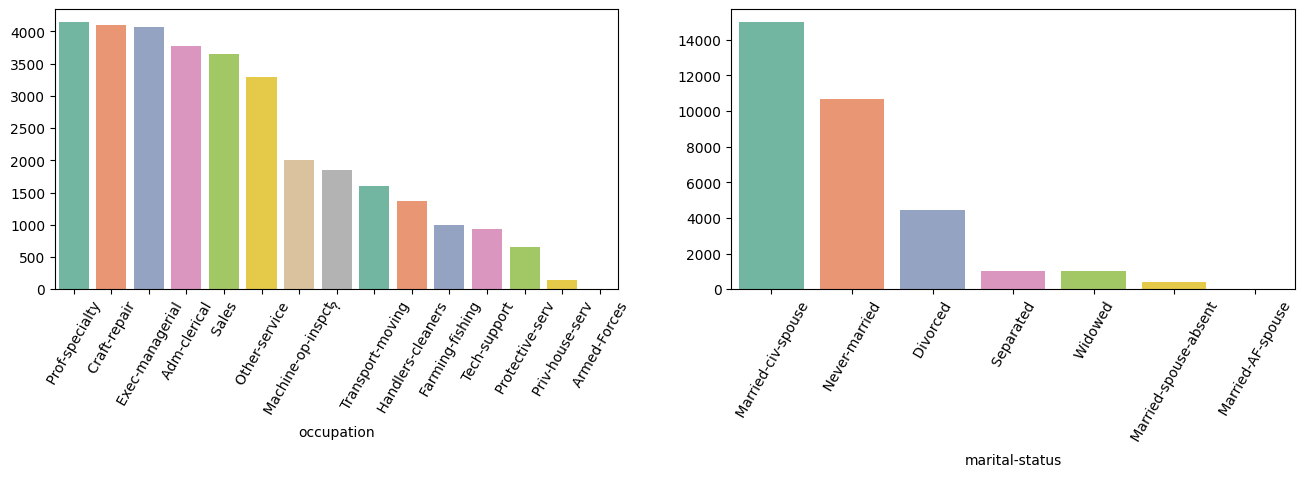

In [ ]:
plt.figure(figsize=(16,8))

plt.subplot(2, 2, 1)
counts1 = data['occupation'].value_counts()
sns.barplot(x = counts1.index, y = counts1.values, palette="Set2")
plt.xticks(rotation=60)

plt.subplot(2, 2, 2)
counts2 = data['marital-status'].value_counts()
sns.barplot(x = counts2.index, y = counts2.values, palette='Set2')
plt.xticks(rotation=60)

plt.show()

In [ ]:
cat_cols['workclass'].value_counts()

workclass
Private             22696
Self-emp-not-inc     2541
Local-gov            2093
?                    1836
State-gov            1298
Self-emp-inc         1116
Federal-gov           960
Without-pay            14
Never-worked            7
Name: count, dtype: int64

In [ ]:
cat_cols['native-country'].value_counts()

native-country
United-States                 29170
Mexico                          643
?                               583
Philippines                     198
Germany                         137
Canada                          121
Puerto-Rico                     114
El-Salvador                     106
India                           100
Cuba                             95
England                          90
Jamaica                          81
South                            80
China                            75
Italy                            73
Dominican-Republic               70
Vietnam                          67
Guatemala                        64
Japan                            62
Poland                           60
Columbia                         59
Taiwan                           51
Haiti                            44
Iran                             43
Portugal                         37
Nicaragua                        34
Peru                             31
France       

****
Мысли по категориальным признакам: Есть колонки, которые подходят под One Hot Encoder - **male**, **race**, **marital-status**

К колонке **education** применим Label Encoder

Из колонки **native-country** выведем новый признак - **is_USA**.

Насчет остальных еще подумаем

****

In [ ]:
data['is_USA'] = data['native-country'].apply(lambda x: 1 if x == ' United-States' else 0)
data.drop('native-country', axis=1, inplace=True)

data

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,salary,is_USA
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,<=50K,1
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,<=50K,1
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,<=50K,1
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,<=50K,1
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,<=50K,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,<=50K,1
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,>50K,1
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,<=50K,1
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,<=50K,1


****
Корреляционный анализ

In [ ]:
num_cols = data.select_dtypes(include=int)
cat_cols = data.select_dtypes(include=object)


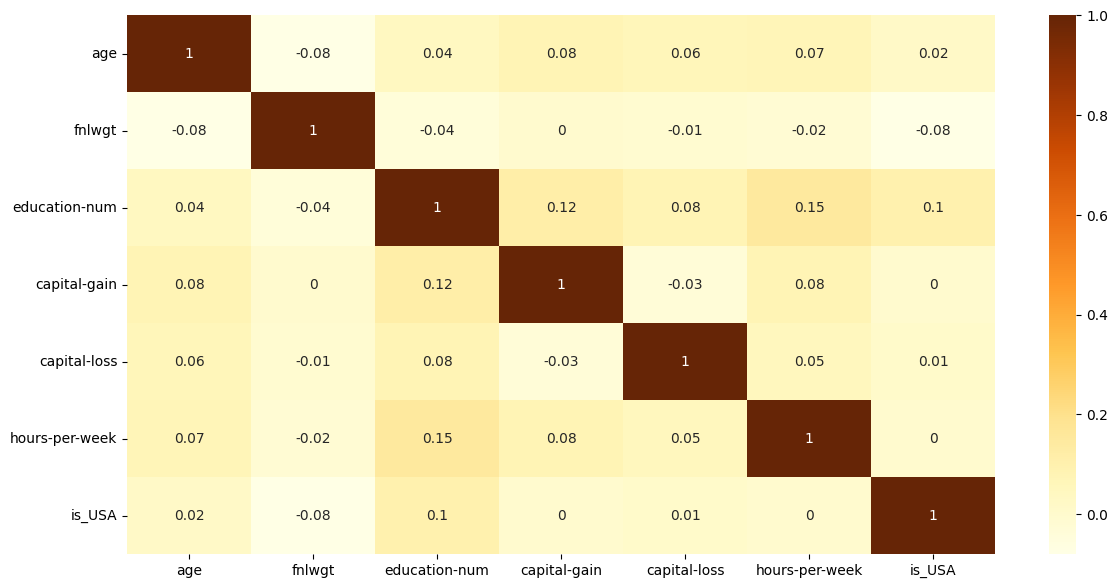

In [ ]:
correlation = num_cols.corr().round(2)
plt.figure(figsize = (14,7))
sns.heatmap(correlation, annot = True, cmap = 'YlOrBr');

Коэффициент корреляции Пирса показал, что нет коррелирующих признаков.

In [ ]:
import scipy.stats

def cramers_v(x, y):
    confusion_matrix = pd.crosstab(x, y)
    chi2 = scipy.stats.chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2 / n
    r, k = confusion_matrix.shape
    phi2corr = max(0, phi2 - ((k-1)*(r-1))/(n-1))
    rcorr = r - ((r-1)**2)/(n-1)
    kcorr = k - ((k-1)**2)/(n-1)
    return np.sqrt(phi2corr / min((kcorr-1), (rcorr-1)))

for column in cat_cols:
     print(f'Корреляция {column} совместно с таргетом равна:', round(cramers_v(cat_cols[column], y), 3))


Корреляция workclass совместно с таргетом равна: 0.179
Корреляция education совместно с таргетом равна: 0.368
Корреляция marital-status совместно с таргетом равна: 0.447
Корреляция occupation совместно с таргетом равна: 0.351
Корреляция relationship совместно с таргетом равна: 0.453
Корреляция race совместно с таргетом равна: 0.1
Корреляция sex совместно с таргетом равна: 0.216
Корреляция salary совместно с таргетом равна: 1.0


Коэффициент корреляции Крамера показал, что есть признаки, которые хоть как-либо влияют на наш таргет. Это колонки marital-status, relationship, education и occupation

Корреляция не большая, но хоть что-то

****
Feature Engineering
****

In [ ]:
X = data.drop('salary', axis=1)
y = data['salary']
le = LabelEncoder()
y = le.fit_transform(y)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

In [ ]:
class DataPipeline(BaseEstimator, TransformerMixin):

    def __init__(self, num_cols):
        self.num_cols = num_cols
        self.quantile_85 = {}
        self.quantile_15 = {}

    def fit(self, data, y=None):
        for column in self.num_cols:
            if column != 'is_USA':
                self.quantile_85[column] = data[column].quantile(0.85)
                self.quantile_15[column] = data[column].quantile(0.15)

        return self

    def transform(self, data, y=None):
        for column in self.num_cols:
            if column != 'is_USA':
                data.loc[data[column] > self.quantile_85[column], column] = self.quantile_85[column]
                data.loc[data[column] < self.quantile_15[column], column] = self.quantile_15[column]

        return data


In [ ]:
pipe = Pipeline([('data_pipeline', DataPipeline(num_cols))])

X_train_transformed = pipe.fit_transform(X_train)
X_test_transformed = pipe.transform(X_test)


<Axes: >

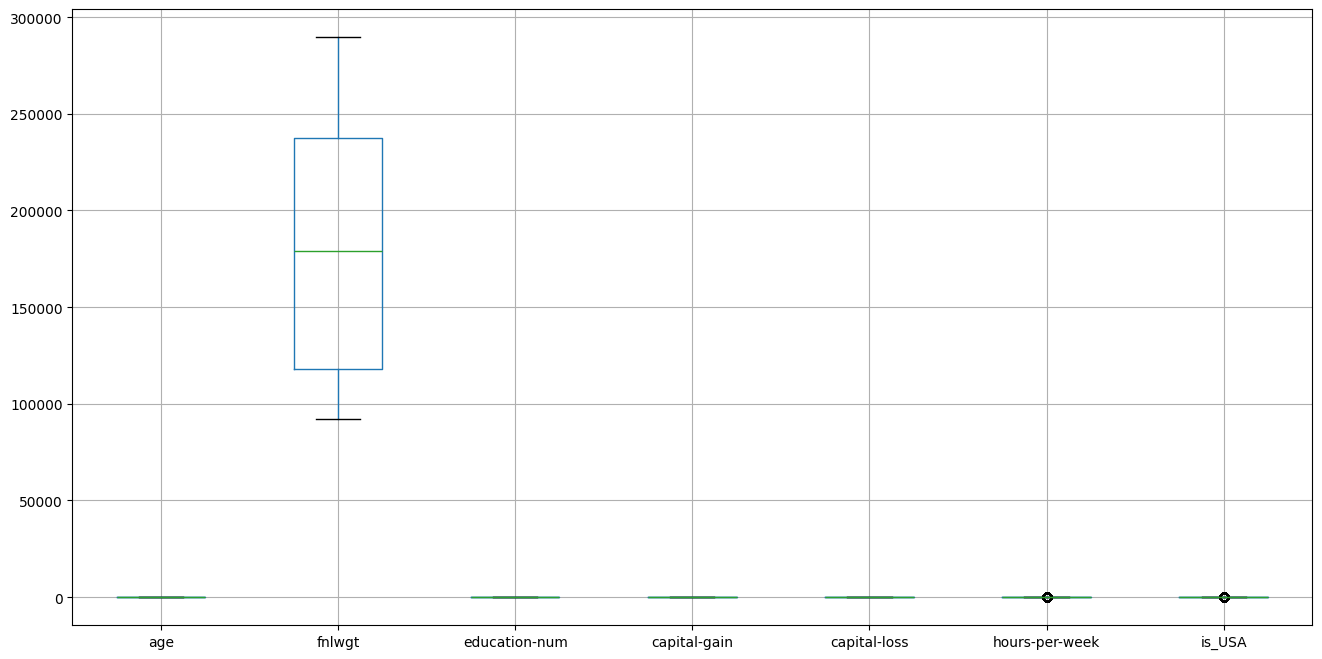

In [ ]:
X_train_transformed.boxplot(figsize=(16,8))

In [ ]:
cat_cols.drop('salary', axis=1, inplace=True)

In [ ]:
cols_for_ohe = [x for x in cat_cols if X[x].nunique() < 5]
cols_for_mte = [x for x in cat_cols if X[x].nunique() >= 5]

cols_for_ohe_idx = [list(X.columns).index(col) for col in cols_for_ohe]
cols_for_mte_idx = [list(X.columns).index(col) for col in cols_for_mte]
numeric_cols_idx = [list(X.columns).index(col) for col in num_cols]

t = [('OneHotEncoder', OneHotEncoder(), cols_for_ohe_idx),
     ('MeanTargetEncoder', TargetEncoder(), cols_for_mte_idx),
     ('StandardScaler', StandardScaler(), numeric_cols_idx)]

col_transform = ColumnTransformer(transformers=t)


In [ ]:
X_train_all = col_transform.fit_transform(X_train_transformed, y_train)
X_test_all = col_transform.transform(X_test_transformed)

Классическая логистическая регрессия

In [ ]:
parameters = {'penalty': ['l1', 'l2'], 'C': [1, 10, 100, 1000]}

grid_lr = GridSearchCV(estimator=LogisticRegression(),
                       param_grid=parameters,
                       scoring='accuracy',
                       cv=5,
                       verbose=0)

grid_lr.fit(X_train_all, y_train)
print(f"Best parameter (CV score={grid_lr.best_score_:.5f}):")
print(grid_lr.best_params_)


Best parameter (CV score=0.82950):
{'C': 1, 'penalty': 'l2'}


In [ ]:
print(classification_report(grid_lr.predict(X_test_all), y_test))


              precision    recall  f1-score   support

           0       0.93      0.86      0.89      7987
           1       0.53      0.70      0.61      1782

    accuracy                           0.83      9769
   macro avg       0.73      0.78      0.75      9769
weighted avg       0.86      0.83      0.84      9769



Поработаем с таргетной переменной

In [ ]:
from imblearn.over_sampling import SMOTE

smote = SMOTE()
X_smote_train, y_smote_train = smote.fit_resample(X_train_all, y_train)


unique, counts = np.unique(y_smote_train, return_counts=True)
class_counts = dict(zip(unique, counts))
print(class_counts)


{0: 17303, 1: 17303}


In [ ]:
grid_lr.fit(X_smote_train, y_smote_train)
print(classification_report(grid_lr.predict(X_test_all), y_test))


              precision    recall  f1-score   support

           0       0.76      0.94      0.84      6027
           1       0.84      0.53      0.65      3742

    accuracy                           0.78      9769
   macro avg       0.80      0.73      0.75      9769
weighted avg       0.79      0.78      0.77      9769



SMOTE показал более хорошие показатели на точности и F-1 мере, но в остальном качество упало

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline

param_grid = {
    "random_forest__max_depth": [10, 15, 20],
    "random_forest__min_samples_split": [2, 5, 10],
    "random_forest__min_samples_leaf": [1, 3, 5]
}


rfc = RandomForestClassifier()
pipeline = Pipeline([('random_forest', rfc)])

search = GridSearchCV(pipeline,
                      param_grid,
                      scoring='accuracy',
                      verbose=10)

search.fit(X_train_all, y_train)

print(f"Best parameter (CV score={search.best_score_:.5f}):")
print(search.best_params_)


Fitting 5 folds for each of 27 candidates, totalling 135 fits
[CV 1/5; 1/27] START random_forest__max_depth=10, random_forest__min_samples_leaf=1, random_forest__min_samples_split=2
[CV 1/5; 1/27] END random_forest__max_depth=10, random_forest__min_samples_leaf=1, random_forest__min_samples_split=2;, score=0.836 total time=   0.9s
[CV 2/5; 1/27] START random_forest__max_depth=10, random_forest__min_samples_leaf=1, random_forest__min_samples_split=2
[CV 2/5; 1/27] END random_forest__max_depth=10, random_forest__min_samples_leaf=1, random_forest__min_samples_split=2;, score=0.843 total time=   0.9s
[CV 3/5; 1/27] START random_forest__max_depth=10, random_forest__min_samples_leaf=1, random_forest__min_samples_split=2
[CV 3/5; 1/27] END random_forest__max_depth=10, random_forest__min_samples_leaf=1, random_forest__min_samples_split=2;, score=0.837 total time=   0.9s
[CV 4/5; 1/27] START random_forest__max_depth=10, random_forest__min_samples_leaf=1, random_forest__min_samples_split=2
[CV 4

In [ ]:
print(classification_report(search.predict(X_test_all), y_test))

              precision    recall  f1-score   support

           0       0.93      0.87      0.90      7951
           1       0.56      0.72      0.63      1818

    accuracy                           0.84      9769
   macro avg       0.75      0.80      0.77      9769
weighted avg       0.86      0.84      0.85      9769



Случаный лес лидирует по качеству
****
Поработаем с отбором признаков

**SelectKBest**

In [ ]:
from sklearn.feature_selection import SelectKBest, f_classif, f_regression

selectK = SelectKBest(f_classif, k=10)

selectK.fit(X_train_all, y_train)
X_train_select = selectK.transform(X_train_all)

In [ ]:
X_test_select = selectK.transform(X_test_all)
X_test_select

array([[ 0.        ,  1.        ,  0.21691084, ...,  1.21909776,
        -0.85260258, -0.08351608],
       [ 1.        ,  0.        ,  0.21691084, ..., -1.29974879,
         0.36451617, -1.66017359],
       [ 1.        ,  0.        ,  0.29506008, ...,  0.47277286,
         1.58163492,  1.17780992],
       ...,
       [ 0.        ,  1.        ,  0.29540359, ...,  1.03251653,
        -0.2440432 ,  1.49314142],
       [ 0.        ,  1.        ,  0.21691084, ...,  0.65935408,
         1.58163492,  1.49314142],
       [ 1.        ,  0.        ,  0.21691084, ..., -1.29974879,
        -0.2440432 , -1.66017359]])

In [ ]:
grid_lr.fit(X_train_select, y_train)
print(classification_report(grid_lr.predict(X_test_select), y_test))
selected_features = selectK.get_support()
print(selected_features)


              precision    recall  f1-score   support

           0       0.93      0.86      0.89      8000
           1       0.53      0.70      0.60      1769

    accuracy                           0.83      9769
   macro avg       0.73      0.78      0.75      9769
weighted avg       0.86      0.83      0.84      9769

[ True  True  True  True  True  True  True False  True False  True False
 False  True False]


Результатов не принес
****
RFE

In [ ]:
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestClassifier

lr = LogisticRegression()
rfe = RFE(lr, n_features_to_select=10)

X_train_rfe = rfe.fit_transform(X_train_all, y_train)
X_test_rfe = rfe.transform(X_test_all)


In [ ]:
grid_lr.fit(X_train_rfe, y_train)
print(classification_report(grid_lr.predict(X_test_rfe), y_test))
selected_features = selectK.get_support()
print(selected_features)


              precision    recall  f1-score   support

           0       0.93      0.86      0.89      7987
           1       0.53      0.70      0.60      1782

    accuracy                           0.83      9769
   macro avg       0.73      0.78      0.75      9769
weighted avg       0.86      0.83      0.84      9769

[ True  True  True  True  True  True  True False  True False  True False
 False  True False]


Результат так же не улучшился

**SelectFromModel**

In [ ]:
from sklearn.feature_selection import SelectFromModel


sfm = SelectFromModel(lr)

X_train_sfm = sfm.fit_transform(X_train_all, y_train)
X_test_sfm = sfm.transform(X_test_all)


In [ ]:
grid_lr.fit(X_train_sfm, y_train)
print(classification_report(grid_lr.predict(X_test_sfm), y_test))
selected_features = selectK.get_support()
print(selected_features)


              precision    recall  f1-score   support

           0       0.93      0.85      0.89      8105
           1       0.49      0.70      0.58      1664

    accuracy                           0.83      9769
   macro avg       0.71      0.77      0.73      9769
weighted avg       0.86      0.83      0.84      9769

[ True  True  True  True  True  True  True False  True False  True False
 False  True False]


**Переборный**

In [ ]:
from sklearn.feature_selection import SequentialFeatureSelector


sfs = SequentialFeatureSelector(lr, n_features_to_select=10, scoring='accuracy')

X_train_sfs = sfs.fit_transform(X_train_all, y_train)
X_test_sfs = sfs.transform(X_test_all)


In [ ]:
grid_lr.fit(X_train_sfs, y_train)
print(classification_report(grid_lr.predict(X_test_sfs), y_test))
selected_features = selectK.get_support()
print(selected_features)


              precision    recall  f1-score   support

           0       0.93      0.86      0.89      8051
           1       0.51      0.70      0.59      1718

    accuracy                           0.83      9769
   macro avg       0.72      0.78      0.74      9769
weighted avg       0.86      0.83      0.84      9769

[ True  True  True  True  True  True  True False  True False  True False
 False  True False]


****
Выводы
***

Лучше всего с задачей справился случайный лес со своим встроенным методом отбора признаков.

По отбору признаков лучше всего себя показали SelecKBest & RFE
